In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df=pd.read_csv('Happiness Report.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [134]:
#Getting the unique value and their counts 
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [135]:
#Univariate Description
desc= df.drop(columns=['Country','Region']).describe()
desc

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [136]:
desc['Happiness Rank']['min']

1.0

In [137]:
#get the min and max row entry
def get_min_max(df,type,column,get='Country'):
  if type == min:
    m = np.min(df[column])
  else:
    m = np.max(df[column])
  return df[df[column]==m][get]

In [138]:
get_min_max(df,min,'Happiness Rank','Country').values

array(['Switzerland'], dtype=object)

In [139]:
print('Happiest Country : ',get_min_max(df,min,'Happiness Rank').values.flatten())
print('Richest Country : ',get_min_max(df,max,'Economy (GDP per Capita)').values.flatten())
print('Most Families : ',get_min_max(df,max,'Family').values.flatten())
print('Healthiest Country : ',get_min_max(df,max,'Health (Life Expectancy)').values.flatten())
print('Most Free Country : ',get_min_max(df,max,'Freedom').values.flatten())
print('Most trusted Govt : ',get_min_max(df,max,'Trust (Government Corruption)').values.flatten())
print('Most Generous Country : ',get_min_max(df,max,'Generosity').values.flatten())

Happiest Country :  ['Switzerland']
Richest Country :  ['Qatar']
Most Families :  ['Iceland']
Healthiest Country :  ['Singapore']
Most Free Country :  ['Norway']
Most trusted Govt :  ['Rwanda']
Most Generous Country :  ['Myanmar']


In [140]:
print('Saddest Country : ',get_min_max(df,max,'Happiness Rank').values.flatten())
print('Poorest Country : ',get_min_max(df,min,'Economy (GDP per Capita)').values.flatten())
print('Least Families : ',get_min_max(df,min,'Family').values.flatten())
print('Unhealthiest Country : ',get_min_max(df,min,'Health (Life Expectancy)').values.flatten())
print('Least Free Country : ',get_min_max(df,min,'Freedom').values.flatten())
print('Least trusted Govt : ',get_min_max(df,min,'Trust (Government Corruption)').values.flatten())
print('Least Generous Country : ',get_min_max(df,min,'Generosity').values.flatten())

Saddest Country :  ['Togo']
Poorest Country :  ['Congo (Kinshasa)']
Least Families :  ['Central African Republic']
Unhealthiest Country :  ['Sierra Leone']
Least Free Country :  ['Iraq']
Least trusted Govt :  ['Indonesia']
Least Generous Country :  ['Greece']


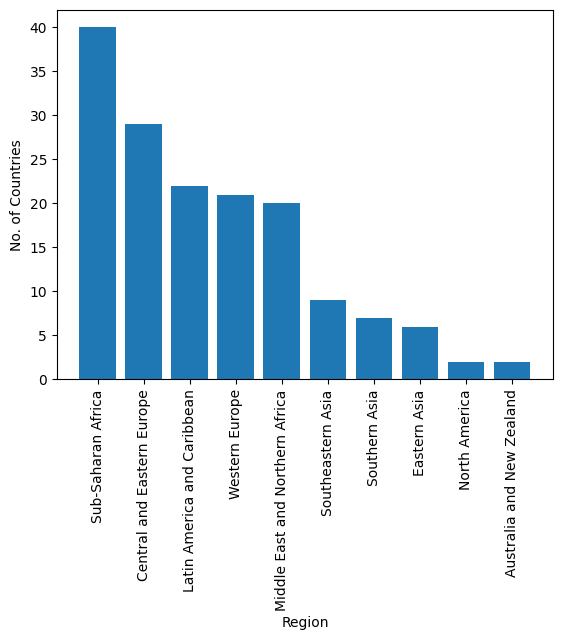

In [141]:
count_reg = df['Region'].value_counts()
plt.bar(count_reg.index,count_reg.values)
plt.xlabel('Region')
plt.ylabel('No. of Countries')
plt.xticks(rotation=90)
plt.show()

In [142]:
#Region Wise Happiest Country
reg_uni=np.unique(df['Region'])
for i in reg_uni:
  print('Happiest Country : ' 'in ',i,'is ',get_min_max(df[df['Region']==i],min,'Happiness Rank').values.flatten())

Happiest Country : in  Australia and New Zealand is  ['New Zealand']
Happiest Country : in  Central and Eastern Europe is  ['Czech Republic']
Happiest Country : in  Eastern Asia is  ['Taiwan']
Happiest Country : in  Latin America and Caribbean is  ['Costa Rica']
Happiest Country : in  Middle East and Northern Africa is  ['Israel']
Happiest Country : in  North America is  ['Canada']
Happiest Country : in  Southeastern Asia is  ['Singapore']
Happiest Country : in  Southern Asia is  ['Bhutan']
Happiest Country : in  Sub-Saharan Africa is  ['Mauritius']
Happiest Country : in  Western Europe is  ['Switzerland']


In [143]:
#Region Wise Saddest Country
reg_uni=np.unique(df['Region'])
for i in reg_uni:
  print('Saddest Country : ' 'in ',i,'is ',get_min_max(df[df['Region']==i],max,'Happiness Rank').values.flatten())

Saddest Country : in  Australia and New Zealand is  ['Australia']
Saddest Country : in  Central and Eastern Europe is  ['Bulgaria']
Saddest Country : in  Eastern Asia is  ['Mongolia']
Saddest Country : in  Latin America and Caribbean is  ['Haiti']
Saddest Country : in  Middle East and Northern Africa is  ['Syria']
Saddest Country : in  North America is  ['United States']
Saddest Country : in  Southeastern Asia is  ['Cambodia']
Saddest Country : in  Southern Asia is  ['Afghanistan']
Saddest Country : in  Sub-Saharan Africa is  ['Togo']
Saddest Country : in  Western Europe is  ['Greece']


<ipython-input-144-ff5db68ac81d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr= df.corr()


<Axes: >

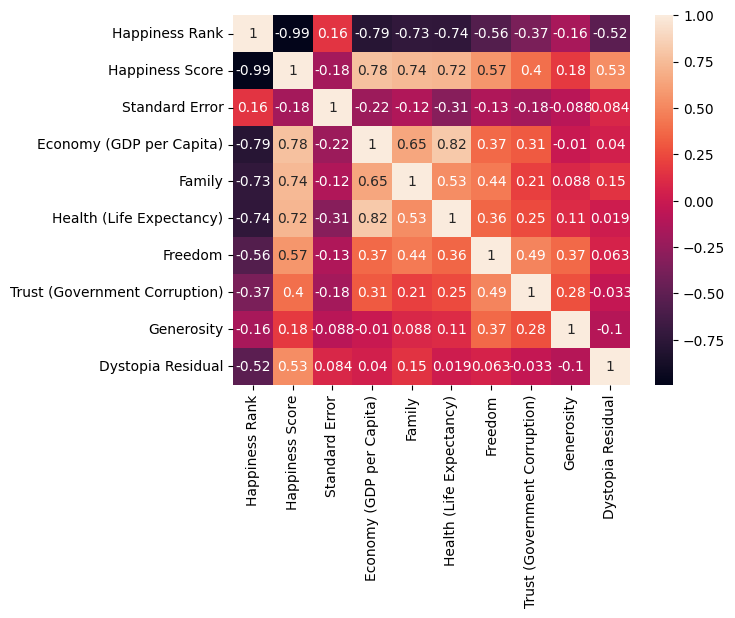

In [144]:
df_corr= df.corr()
sns.heatmap(df_corr,annot=True)

<Figure size 1500x700 with 0 Axes>

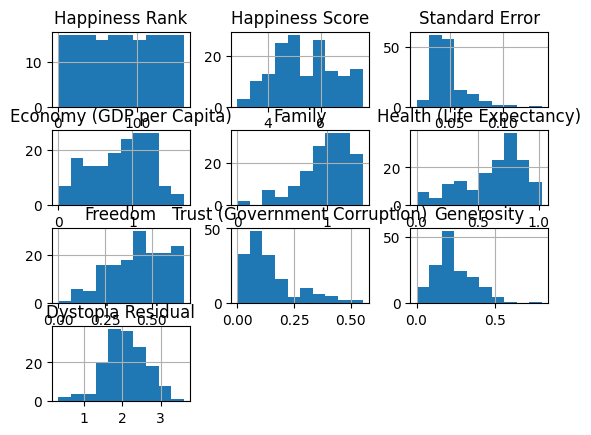

In [145]:
plt.figure(figsize = (15,7))
df.hist()
plt.show()

In [146]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Multivariate Analysis

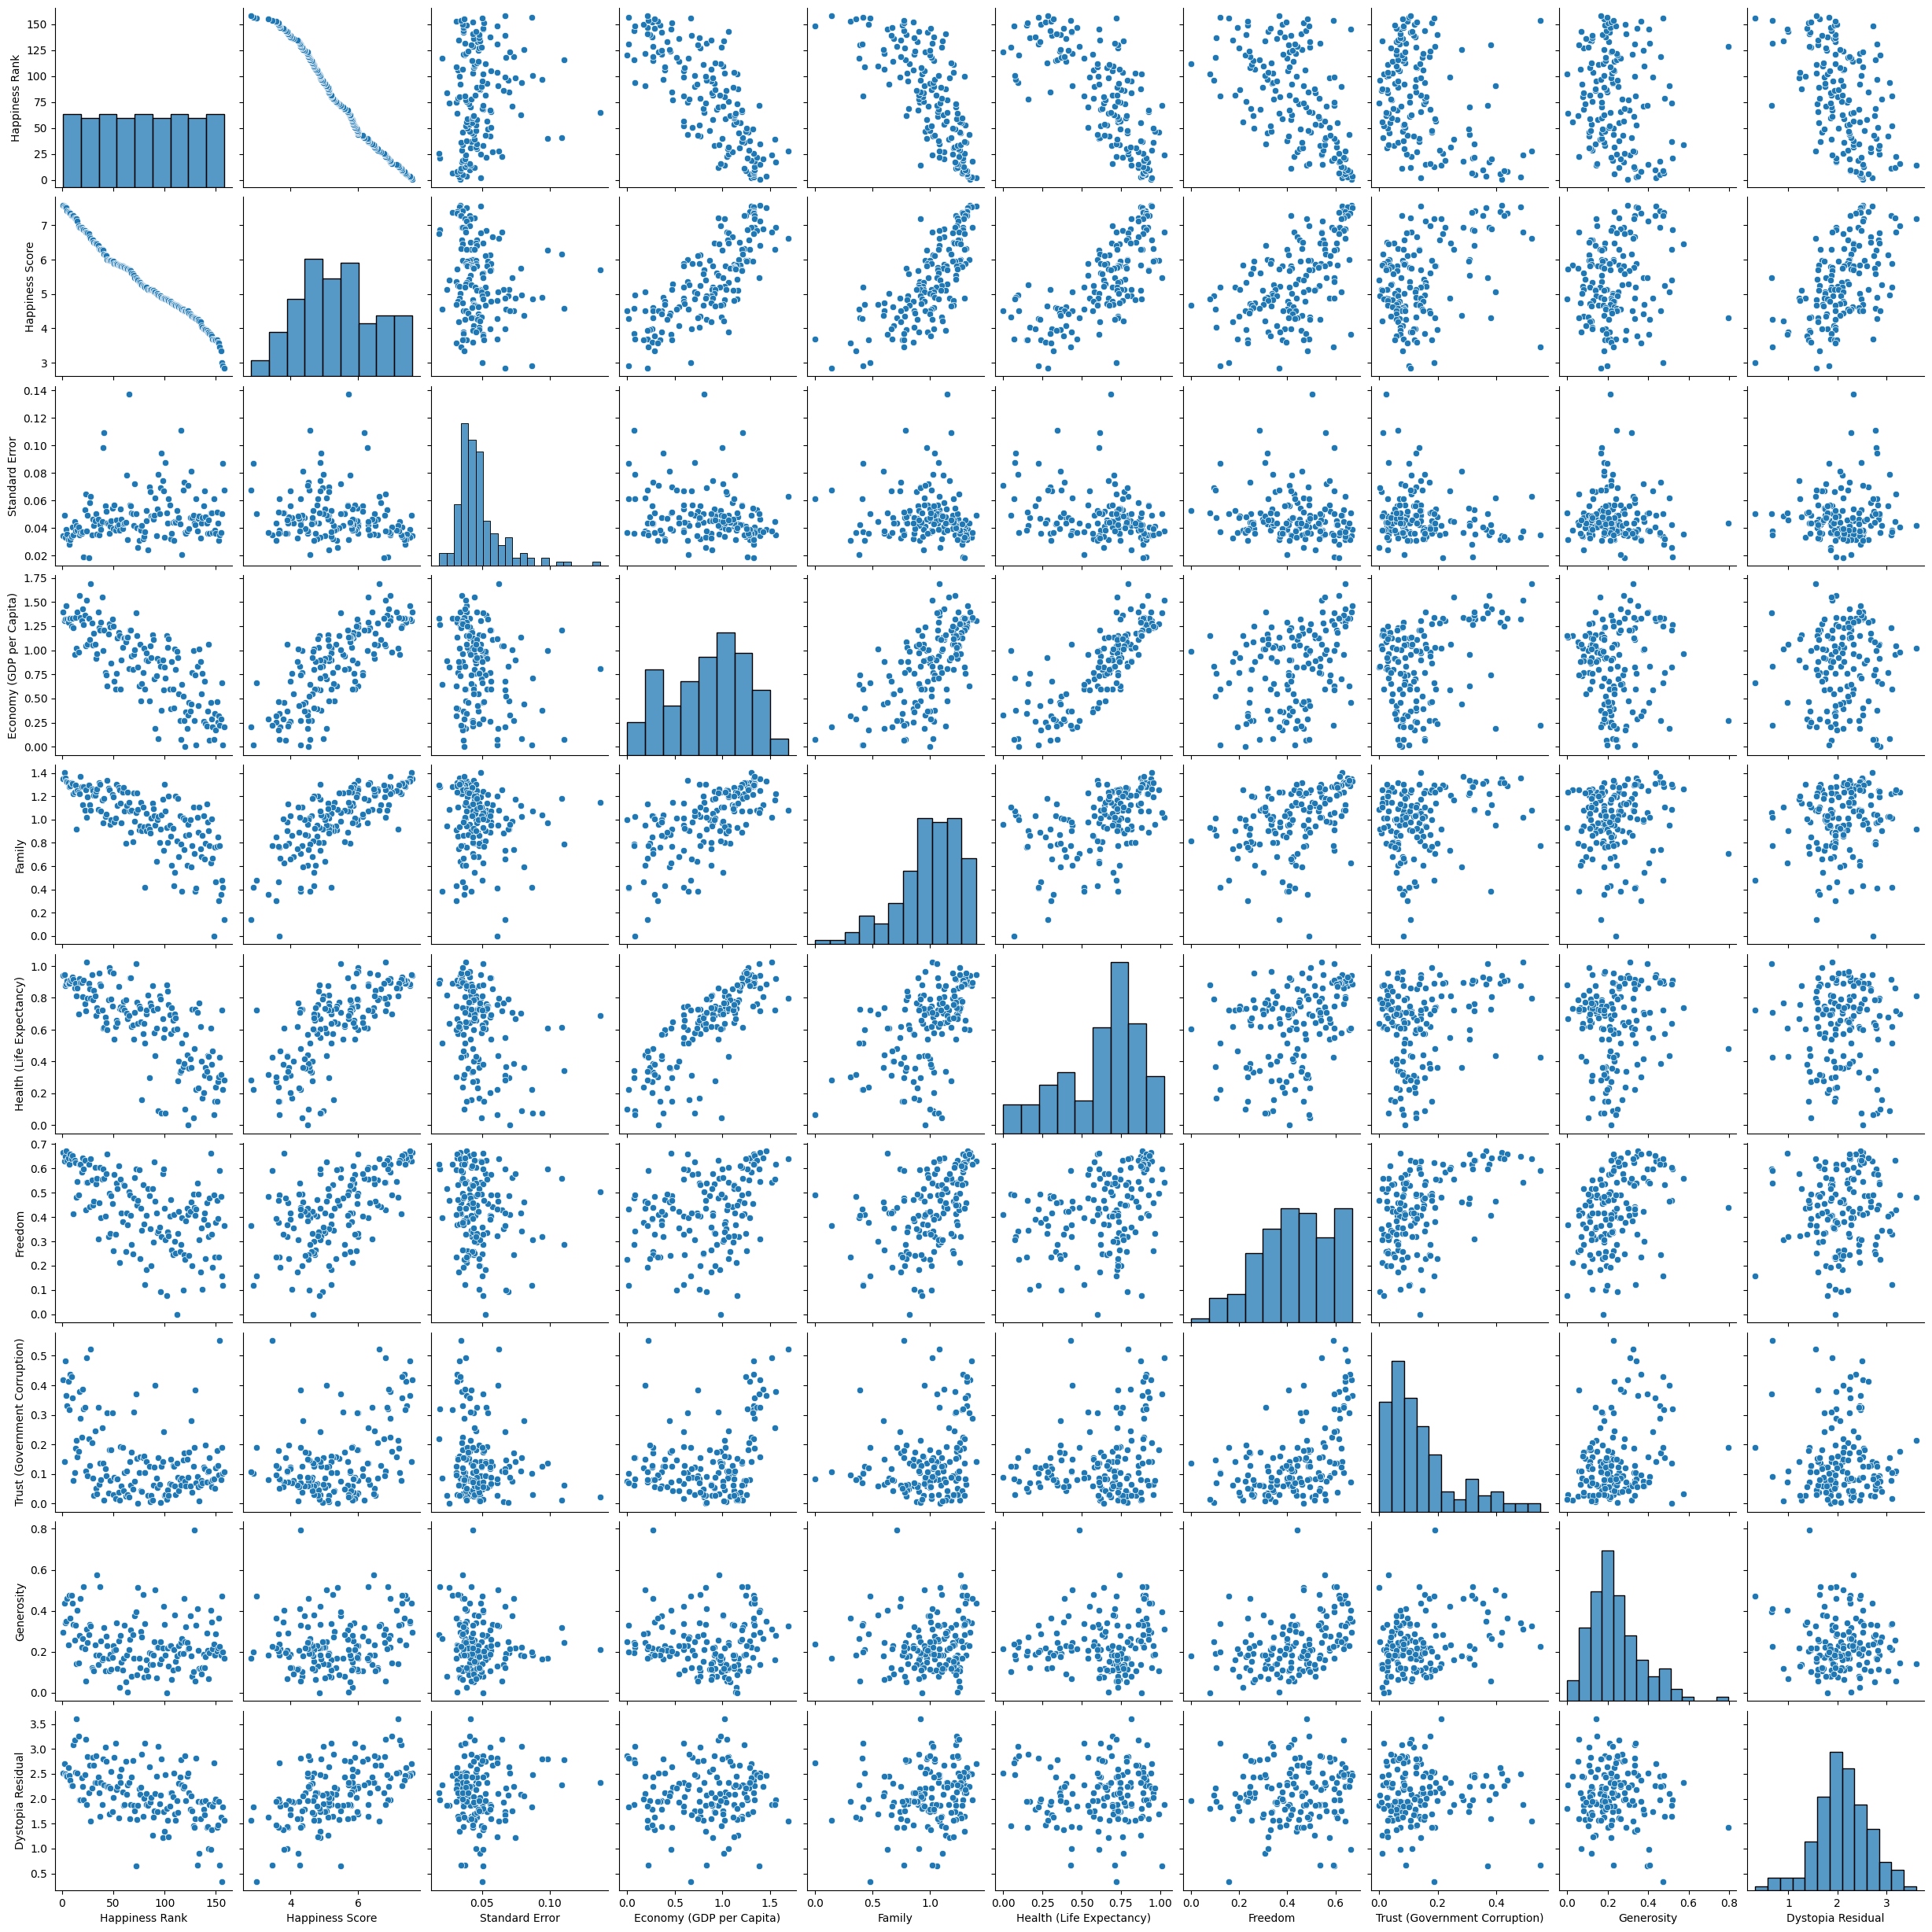

In [147]:
sns.pairplot(df)

# Outlier Detection

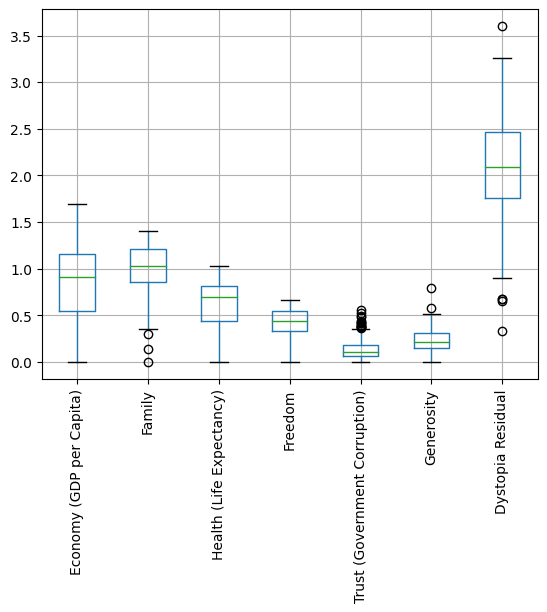

In [148]:
#We want to see the outliers 
df.iloc[:,5:].boxplot()
plt.xticks(rotation=90)
plt.show()

In [149]:
def get_outliers(df,column,type='both'):
  q3,q1 =np.percentile(df[column],[75,25])
  iqr=q3-q1
  low_lim=q1-1.5*iqr
  high_lim= q3+1.5*iqr
  if type == 'both':
    df_out = df[(df[column]>high_lim) | (df[column]<low_lim)]
  if type == 'up':
    df_out = df[df[column]>high_lim]
  if type == 'low':
    df_out = df[df[column]<low_lim]
  return df_out

In [150]:
#Getting outliers 
get_outliers(df,'Trust (Government Corruption)','up')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
16,Luxembourg,Western Europe,17,6.946,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674


From the above data we can see that very high trust in government are in either high ranking countries or low ranking countries

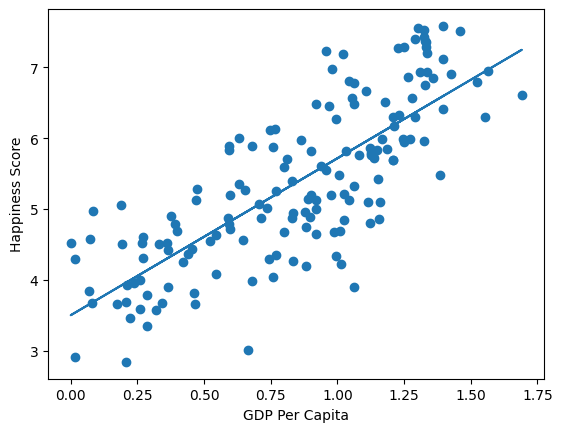

In [151]:
x=df['Economy (GDP per Capita)']
y=df['Happiness Score']
m,b = np.polyfit(x,y,1)
plt.plot(x,m*x+b)
plt.scatter(x,y)
plt.xlabel('GDP Per Capita')
plt.ylabel('Happiness Score')
plt.show()